In [92]:
import pandas as pd

In [93]:
import os

In [94]:
import numpy as np

In [95]:
os.chdir(r'D:\subFinder')

In [96]:
# read in the PUL data
pul_data = pd.read_csv(r"Data/Supervised_Sequences/updated_data_filtered.csv")

In [97]:
pul_data = pul_data.sort_values("PULid")

In [98]:
pul_data = pul_data.reset_index(drop = True)

In [99]:
# pul_data

In [100]:
path = r"D:\subFinder\IFDP_sub\PUL\substrate_out"

In [101]:
catch = []
catch_no_preds = []
for item in os.listdir(path):
    pulid = item.split(".")[0]
    df = pd.read_csv(path + "\\" + item)
#     print(df.shape)
#     df = df.sort_values(df.columns[1], ascending = False)
    max_abundance = df["Relative abundance"].max()
    if np.isnan(max_abundance):
        catch_no_preds.append(pulid)  
#     print(max_abundance)
    pred_substrates = df[df["Relative abundance"] == max_abundance]
    sub_preds = pred_substrates.iloc[:,0]
    sub_preds = pd.DataFrame(sub_preds)
    sub_preds["PULid"] = pulid
    catch.append(sub_preds)

In [102]:
len(catch_no_preds)

105

In [103]:
catch_df = pd.concat(catch)

In [104]:
catch_df

,Unnamed: 0,PULid
16,Arabinoxylan,PUL
0,Xanthan,PUL0001
0,Xanthan,PUL0002
1,Beta-glucan,PUL0002
2,Cellulose,PUL0002
...,...,...
15,Xylan,PUL0599
16,Arabinoxylan,PUL0599
17,Resistant starch,PUL0600
15,Xylan,PUL0602


In [105]:
catch_df.columns = ["IFDP_high_level_substr", "PULid"]

In [106]:
catch_df["IFDP_high_level_substr"] = catch_df["IFDP_high_level_substr"].str.lower()

In [107]:
len(set(pul_data["PULid"]).intersection(catch_df["PULid"]))/pul_data["PULid"].nunique()

0.7177615571776156

In [108]:
len(set(pul_data["PULid"]).difference(catch_df["PULid"]))

116

In [109]:
# catch_df["IFDP_high_level_substr"].value_counts()

In [110]:
## read in the substrate mapping file
sub_mapping = pd.read_excel(r"D:\subFinder\IFDP_sub\substrate_mapping_table_IFDP_dbCAN.xlsx")

In [111]:
sub_mapping["Substrate_dbCAN_seq_dbCAN_PUL_approach"] = sub_mapping["Substrate_dbCAN_seq_dbCAN_PUL_approach"].map(lambda x: str(x).split("/")[0])

In [112]:
sub_mapping["Substrate_IFDP"] = sub_mapping["Substrate_IFDP"].str.lower()

In [113]:
sub_mapping = sub_mapping[sub_mapping["Substrate_dbCAN_seq_dbCAN_PUL_approach"] != "nan"]

In [114]:
sub_mapping = sub_mapping.iloc[:,[0,2]]

In [115]:
pul_data = pul_data.replace(['beta-mannan', 'alpha-mannan'], 'mannan')

In [116]:
sub_mapping = sub_mapping.replace(['alpha-mannan&beta-mannan'], 'mannan')

In [117]:
catch_df = catch_df.merge(sub_mapping, left_on = "IFDP_high_level_substr", right_on = "Substrate_IFDP", how = "inner")

In [118]:
catch_df.dropna()

,IFDP_high_level_substr,PULid,Substrate_dbCAN_seq_dbCAN_PUL_approach,Substrate_IFDP
0,arabinoxylan,PUL,arabinoxylan,arabinoxylan
1,arabinoxylan,PUL0003,arabinoxylan,arabinoxylan
2,arabinoxylan,PUL0006,arabinoxylan,arabinoxylan
3,arabinoxylan,PUL0010,arabinoxylan,arabinoxylan
4,arabinoxylan,PUL0013,arabinoxylan,arabinoxylan
...,...,...,...,...
1121,arabinan,PUL0532,arabinan,arabinan
1122,arabinan,PUL0541,arabinan,arabinan
1123,arabinan,PUL0546,arabinan,arabinan
1124,arabinan,PUL0563,arabinan,arabinan


In [119]:
catch_df["PULid"].nunique()

469

In [120]:
catch_df = catch_df[["Substrate_dbCAN_seq_dbCAN_PUL_approach", "PULid"]]

In [121]:
catch_df.columns = ["IFDP_high_level_substr", "PULid"]

In [122]:
merged_data = pul_data[["PULid", "high_level_substr"]].merge(catch_df)

In [123]:
merged_data.columns = ["PULid","Verified_high_level_substr", "IFDP_high_level_substr"]

In [124]:
merged_data["IFDP_high_level_substr"] = merged_data["IFDP_high_level_substr"].str.lower()

In [125]:
merged_data["Verified_high_level_substr"].sort_values().unique()

array(['agarose', 'alginate', 'alpha-glucan', 'arabinan',
       'arabinogalactan', 'arabinoxylan', 'beta-galactooligosaccharide',
       'beta-glucan', 'capsule polysaccharide degradation',
       'capsule polysaccharide synthesis', 'carrageenan', 'cellulose',
       'chitin', 'fructan', 'galactan', 'galactomannan', 'glucomannan',
       'glycogen', 'glycosaminoglycan', 'host glycan', 'mannan', 'pectin',
       'starch', 'xylan', 'xyloglucan'], dtype=object)

In [126]:
merged_data["IFDP_high_level_substr"].sort_values().unique()

array(['alginate', 'arabinan', 'arabinogalactan', 'arabinoxylan',
       'beta-glucan', 'carrageenan', 'cellulose', 'chitin', 'fructan',
       'galactan', 'galactomannan', 'glucomannan', 'host glycan',
       'mannan', 'pectin', 'starch', 'xylan', 'xyloglucan'], dtype=object)

In [127]:
common = set(merged_data["Verified_high_level_substr"].sort_values().unique()).intersection(merged_data["IFDP_high_level_substr"].sort_values().unique())

In [128]:
common

{'alginate',
 'arabinan',
 'arabinogalactan',
 'arabinoxylan',
 'beta-glucan',
 'carrageenan',
 'cellulose',
 'chitin',
 'fructan',
 'galactan',
 'galactomannan',
 'glucomannan',
 'host glycan',
 'mannan',
 'pectin',
 'starch',
 'xylan',
 'xyloglucan'}

In [129]:
len(common)

18

In [130]:
len(common)/len(merged_data["Verified_high_level_substr"].sort_values().unique())

0.72

In [131]:
uncommon = set(merged_data["Verified_high_level_substr"].sort_values().unique()).difference(merged_data["IFDP_high_level_substr"].sort_values().unique())

In [132]:
uncommon

{'agarose',
 'alpha-glucan',
 'beta-galactooligosaccharide',
 'capsule polysaccharide degradation',
 'capsule polysaccharide synthesis',
 'glycogen',
 'glycosaminoglycan'}

In [133]:
len(uncommon)

7

In [134]:
merged_data_common = merged_data[merged_data["Verified_high_level_substr"].isin(common)]

In [135]:
merged_data_common["PULid"].nunique()

215

In [136]:
pul_data["PULid"].nunique()

411

In [137]:
merged_data_uncommon = merged_data[merged_data["Verified_high_level_substr"].isin(uncommon)]

In [138]:
merged_data_uncommon["PULid"].nunique()

69

In [139]:
merged_data_common["PULid"].nunique()/pul_data["PULid"].nunique()

0.5231143552311436

In [140]:
number_of_preds = merged_data_common["PULid"].value_counts()

In [141]:
number_of_preds = number_of_preds.reset_index()

In [142]:
number_of_preds.columns = ["PULid", "Num_Preds_from_IFDP"]

In [143]:
how_many_preds = number_of_preds["Num_Preds_from_IFDP"].value_counts()

In [144]:
how_many_preds = how_many_preds.reset_index()

In [145]:
how_many_preds.columns = ["Num_Preds_from_IFDP", "Number_of_PULs"]

In [146]:
how_many_preds[how_many_preds["Num_Preds_from_IFDP"] == 1]["Number_of_PULs"].values[0]/how_many_preds["Number_of_PULs"].sum()

0.4883720930232558

In [147]:
how_many_preds[how_many_preds["Num_Preds_from_IFDP"] == 1]["Number_of_PULs"].values[0]/merged_data_common["PULid"].nunique()

0.4883720930232558

In [148]:
how_many_preds[how_many_preds["Num_Preds_from_IFDP"] == 1]["Number_of_PULs"].values[0]

105

In [149]:
merged_data_common["PULid"].nunique()

215

In [150]:
105/215

0.4883720930232558

In [151]:
# 206/411

In [152]:
import matplotlib.pyplot as plt

In [153]:
# 148-54

In [154]:
215-105

110

In [155]:
1-(105/215)

0.5116279069767442

In [156]:
order = how_many_preds["Num_Preds_from_IFDP"].sort_values().values

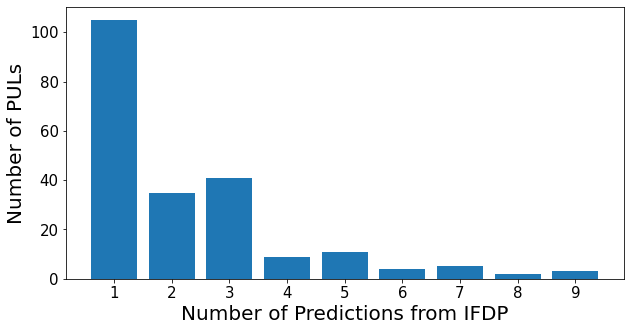

In [157]:
plt.figure(figsize = (10,5))
plt.bar(how_many_preds["Num_Preds_from_IFDP"], how_many_preds["Number_of_PULs"])
plt.xticks(order, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Number of Predictions from IFDP", fontsize = 20)
plt.ylabel("Number of PULs", fontsize = 20)
# plt.title("IFDP makes multiple predictions for ")
plt.show()

In [158]:
puls_with_single_preds = number_of_preds[number_of_preds["Num_Preds_from_IFDP"] == 1]["PULid"].values

In [159]:
puls_with_single_preds_df = merged_data_common[merged_data_common["PULid"].isin(puls_with_single_preds)]

In [160]:
puls_with_single_preds_df.head()

,PULid,Verified_high_level_substr,IFDP_high_level_substr
3,PUL0003,xylan,arabinoxylan
17,PUL0008,fructan,fructan
21,PUL0010,xylan,arabinoxylan
30,PUL0013,arabinan,arabinoxylan
42,PUL0027,alginate,alginate


In [161]:
puls_with_single_preds_df["IFDP_high_level_substr"].value_counts()

chitin             17
arabinoxylan       16
starch             15
alginate           14
xyloglucan         14
beta-glucan         7
fructan             6
carrageenan         6
galactomannan       5
arabinogalactan     4
pectin              1
Name: IFDP_high_level_substr, dtype: int64

In [180]:
# puls_with_single_preds_df["PULid"].values

In [179]:
# pul_data["high_level_substr"].value_counts()

In [183]:
single_preds_puls = puls_with_single_preds_df["PULid"].values

In [184]:
single_pred_og_data = pul_data[pul_data["PULid"].isin(puls_with_single_preds_df["PULid"].values)]["high_level_substr"].value_counts()

In [235]:
puls_with_single_preds_df

,PULid,Verified_high_level_substr,IFDP_high_level_substr
3,PUL0003,xylan,arabinoxylan
17,PUL0008,fructan,fructan
21,PUL0010,xylan,arabinoxylan
30,PUL0013,arabinan,arabinoxylan
42,PUL0027,alginate,alginate
...,...,...,...
617,PUL0572,alginate,alginate
621,PUL0581,fructan,fructan
629,PUL0595,starch,starch
630,PUL0596,starch,starch


In [185]:
pul_left_data = pul_data[~pul_data["PULid"].isin(single_preds_puls)]

In [186]:
pul_left_data.shape

(306, 4)

In [188]:
single_pred_og_data

alginate           14
host glycan        12
starch             12
chitin              9
galactomannan       8
mannan              8
xyloglucan          6
xylan               6
fructan             5
carrageenan         5
pectin              5
beta-glucan         5
arabinan            3
cellulose           2
arabinogalactan     2
arabinoxylan        1
galactan            1
glucomannan         1
Name: high_level_substr, dtype: int64

In [193]:
left_freqs = pul_left_data["high_level_substr"].value_counts()

In [196]:
left_to_keep = left_freqs[left_freqs.index.isin(single_pred_og_data.index)]

In [197]:
left_to_keep

pectin             34
xylan              29
beta-glucan        16
cellulose          14
galactan            9
arabinan            9
mannan              8
galactomannan       7
alginate            7
host glycan         7
chitin              6
arabinoxylan        5
starch              4
carrageenan         3
arabinogalactan     3
fructan             2
glucomannan         2
xyloglucan          1
Name: high_level_substr, dtype: int64

In [201]:
new_order = list(left_to_keep.iloc[:7].index)

In [202]:
new_order

['pectin',
 'xylan',
 'beta-glucan',
 'cellulose',
 'galactan',
 'arabinan',
 'mannan']

In [393]:
test_set = puls_with_single_preds_df[puls_with_single_preds_df["Verified_high_level_substr"].isin(new_order)]

In [364]:
test_set_puls = test_set["PULid"].values

In [394]:
X_test = pul_data[pul_data["PULid"].isin(test_set_puls)]["sig_gene_seq"]

In [395]:
y_test = pul_data[pul_data["PULid"].isin(test_set_puls)]["high_level_substr"].values

In [396]:
y_test

array(['xylan', 'xylan', 'arabinan', 'cellulose', 'arabinan', 'mannan',
       'mannan', 'mannan', 'mannan', 'pectin', 'beta-glucan', 'cellulose',
       'beta-glucan', 'xylan', 'xylan', 'mannan', 'mannan', 'xylan',
       'galactan', 'beta-glucan', 'beta-glucan', 'beta-glucan', 'pectin',
       'mannan', 'pectin', 'arabinan', 'xylan', 'mannan', 'pectin',
       'pectin'], dtype=object)

In [397]:
test_seqs = np.array([test_item.replace("|", ",").replace(",", " ") for test_item in X_test.values])

In [398]:
single_pred_og_data[single_pred_og_data.index.isin(new_order)].values.sum()

30

In [399]:
to_model_data = pul_left_data[pul_left_data["high_level_substr"].isin(new_order)]

In [400]:
to_model_data.shape

(119, 4)

In [209]:
to_model_data["high_level_substr"].value_counts()

pectin         34
xylan          29
beta-glucan    16
cellulose      14
galactan        9
arabinan        9
mannan          8
Name: high_level_substr, dtype: int64

In [483]:
from Codes.Model_architectures import simple_lstm, attention_lstm_model, non_recurrent_attention_model

In [484]:
import gensim

In [512]:
model_sg =gensim.models.word2vec.Word2Vec.load(r"Embedding_Models_10_12//word2vec_sg") 

In [513]:
model_dl = non_recurrent_attention_model(len(new_order), False, model_sg)

In [514]:
model_dl.summary()

Model: "model_20"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_21 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 text_vectorization_20 (TextVec  (None, None)        0           ['input_21[0][0]']               
 torization)                                                                                      
                                                                                                  
 embedding_20 (Embedding)       (None, None, 300)    417000      ['text_vectorization_20[0][0]']  
                                                                                                  
 tanh_mlp (Dense)               (None, None, 150)    45150       ['embedding_20[0][0]']    

In [502]:
from sklearn.model_selection import train_test_split

In [503]:
from sklearn.preprocessing import LabelEncoder

In [515]:
le = LabelEncoder()

In [516]:
X_train, X_valid, y_train, y_valid = train_test_split(to_model_data["sig_gene_seq"], to_model_data["high_level_substr"], 
                                                                  stratify = to_model_data["high_level_substr"],
                                                                  test_size = 0.15)
            
train_seqs = np.array([train_item.replace("|", ",").replace(",", " ") for train_item in X_train])
valid_seqs = np.array([valid_item.replace("|", ",").replace(",", " ") for valid_item in X_valid])
# test_seqs = np.array([test_item.replace("|", ",").replace(",", " ") for test_item in X_test["sig_gene_seq"].values])

In [517]:
le.fit(y_train.values.reshape(-1,1).ravel())

LabelEncoder()

In [518]:
y_train = le.transform(y_train.values.reshape(-1,1).ravel())
            # y_train = y_train.toarray()
            
y_valid = le.transform(y_valid.values.reshape(-1,1).ravel())
            # y_valid = y_valid.toarray()
            
y_train_df = pd.DataFrame(y_train)
            
weights = y_train_df[0].value_counts()/y_train_df[0].value_counts().sum()
            
weights = 1/weights
            
# weights = 1/(y_train.sum(0)/y_train.sum(0).sum())
class_weights = dict(weights)

In [466]:
y_test = le.transform(y_test)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [508]:
import tensorflow as tf

In [519]:
model_dl.fit(train_seqs, y_train, validation_data = (valid_seqs, y_valid), batch_size = 1, epochs = 2000, 
                                     callbacks  = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy", patience = 10,
                                                                                   restore_best_weights=True, mode = "max"), 
                                     validation_batch_size=1, verbose = 1, shuffle = True, class_weight = class_weights)

Epoch 1/2000
101/101 [==============================] - 2s 15ms/step - loss: 12.6817 - accuracy: 0.3465 - val_loss: 1.5099 - val_accuracy: 0.5556
Epoch 2/2000
101/101 [==============================] - 1s 14ms/step - loss: 9.0018 - accuracy: 0.7921 - val_loss: 1.2149 - val_accuracy: 0.7222
Epoch 3/2000
101/101 [==============================] - 1s 12ms/step - loss: 6.4061 - accuracy: 0.8614 - val_loss: 1.0925 - val_accuracy: 0.6667
Epoch 4/2000
101/101 [==============================] - 1s 12ms/step - loss: 4.8850 - accuracy: 0.8713 - val_loss: 0.9998 - val_accuracy: 0.7778
Epoch 5/2000
101/101 [==============================] - 1s 12ms/step - loss: 3.8975 - accuracy: 0.8812 - val_loss: 0.9954 - val_accuracy: 0.7778
Epoch 6/2000
101/101 [==============================] - 1s 12ms/step - loss: 3.2193 - accuracy: 0.8911 - val_loss: 0.9962 - val_accuracy: 0.7222
Epoch 7/2000
101/101 [==============================] - 1s 13ms/step - loss: 2.6087 - accuracy: 0.9208 - val_loss: 1.0264 - val_a

In [520]:
model_dl.evaluate(valid_seqs, y_valid)

1/1 [==============================] - 0s 213ms/step - loss: 1.0512 - accuracy: 0.7778


[1.0512267351150513, 0.7777777910232544]

In [521]:
model_dl.evaluate(test_seqs, y_test)

1/1 [==============================] - 0s 38ms/step - loss: 1.6783 - accuracy: 0.5333


[1.678315281867981, 0.5333333611488342]

In [287]:
y_test_pred = le.inverse_transform(model_dl.predict(test_seqs).argmax(1))

1/1 [==============================] - 0s 39ms/step


array(['xylan', 'xylan', 'xylan', 'xylan', 'arabinan', 'pectin', 'xylan',
       'mannan', 'mannan', 'pectin', 'beta-glucan', 'xylan',
       'beta-glucan', 'arabinan', 'xylan', 'xylan', 'mannan', 'xylan',
       'beta-glucan', 'beta-glucan', 'beta-glucan', 'beta-glucan',
       'pectin', 'cellulose', 'pectin', 'xylan', 'xylan', 'xylan',
       'pectin', 'pectin'], dtype=object)

In [426]:
np.mean(test_set["Verified_high_level_substr"] == test_set["IFDP_high_level_substr"])

0.2

In [299]:
test_set.shape

(30, 3)

In [311]:
vec_size = model_sg.wv.vectors.shape[1]

In [318]:
X_train,  y_train = to_model_data["sig_gene_seq"], to_model_data["high_level_substr"].values

In [336]:
vocab = model_sg.wv.index_to_key
X_train_doc_vectors = []
    
for train_item in X_train.values:
    train_item = train_item.replace("|", ",").split(",")
    word_vectors = []
    for word in train_item: 
        if word in vocab:
            word_vectors.append(model_sg.wv.get_vector(word).reshape(1,-1).tolist()[0])
        else:
            word_vectors.append(np.zeros((1,vec_size)).reshape(1,-1).tolist()[0])
                
                
    if len(word_vectors) == 0: 
        X_train_doc_vectors.append(np.zeros((1,vec_size)).tolist()[0])
    else:
        X_train_doc_vectors.append(np.array(word_vectors).mean(0).tolist())    

In [339]:
# np.array(X_train_doc_vectors).shape

In [340]:
X_test_doc_vectors = []
    
for test_item in X_test.values:
    test_item = test_item.replace("|", ",").split(",")
    word_vectors = []
    for word in test_item: 
        if word in vocab:
            word_vectors.append(model_sg.wv.get_vector(word).reshape(1,-1).tolist()[0])
        else:
            word_vectors.append(np.zeros((1,vec_size)).reshape(1,-1).tolist()[0])
                        
    if len(word_vectors) == 0: 
        X_test_doc_vectors.append(np.zeros((1,vec_size)).tolist()[0])
    else:
        X_test_doc_vectors.append(np.array(word_vectors).mean(0).tolist())    
                

In [322]:
from sklearn.pipeline import Pipeline

In [323]:
from sklearn.multiclass import OneVsRestClassifier

In [324]:
from sklearn.model_selection import GridSearchCV

In [325]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [327]:
parameters_one_vs_rest = {"vr__estimator__n_estimators": [100, 300, 500], 
                              "vr__estimator__class_weight": ["balanced"]}

In [328]:
clf_one_vs_rest = Pipeline([('vr', OneVsRestClassifier(BalancedRandomForestClassifier(n_jobs = 7)))
                                                ])
gs_one_vs_rest = GridSearchCV(clf_one_vs_rest, parameters_one_vs_rest, cv = 5, n_jobs = 7, scoring = "balanced_accuracy", verbose = 0)

In [341]:
gs_one_vs_rest.fit(np.array(X_train_doc_vectors), y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vr',
                                        OneVsRestClassifier(estimator=BalancedRandomForestClassifier(n_jobs=7)))]),
             n_jobs=7,
             param_grid={'vr__estimator__class_weight': ['balanced'],
                         'vr__estimator__n_estimators': [100]},
             scoring='balanced_accuracy')

In [342]:
gs_one_vs_rest.best_score_

0.7051700680272109

In [346]:
y_test_pred = gs_one_vs_rest.predict(np.array(X_test_doc_vectors))

In [349]:
y_test_pred

array(['cellulose', 'xylan', 'xylan', 'xylan', 'arabinan', 'mannan',
       'xylan', 'mannan', 'mannan', 'pectin', 'beta-glucan', 'xylan',
       'beta-glucan', 'arabinan', 'xylan', 'xylan', 'mannan', 'xylan',
       'mannan', 'mannan', 'mannan', 'beta-glucan', 'pectin', 'mannan',
       'pectin', 'cellulose', 'xylan', 'xylan', 'pectin', 'xylan'],
      dtype='<U11')

In [350]:
y_test

array([6, 6, 0, 2, 0, 4, 4, 4, 4, 5, 1, 2, 1, 6, 6, 4, 4, 6, 3, 1, 1, 1,
       5, 4, 5, 0, 6, 4, 5, 5])

In [351]:
np.mean(le.inverse_transform(y_test) == y_test_pred)

0.5666666666666667

In [162]:
import numpy as np

In [163]:
np.mean(puls_with_single_preds_df["IFDP_high_level_substr"] == puls_with_single_preds_df["Verified_high_level_substr"])

0.580952380952381

In [164]:
actual_subs = puls_with_single_preds_df["Verified_high_level_substr"].values

In [165]:
predicted_ifdp_subs = puls_with_single_preds_df["IFDP_high_level_substr"].values

In [166]:
common_order = set(actual_subs).union(predicted_ifdp_subs)

In [167]:
from sklearn.metrics import confusion_matrix

In [168]:
cm = confusion_matrix(actual_subs, predicted_ifdp_subs, normalize = "true", labels = list(common_order))

In [169]:
df_cm = pd.DataFrame(cm, index = list(common_order), columns= list(common_order))

In [170]:
import seaborn as sns

In [171]:
pul_data["high_level_substr"].value_counts()[1:8]

pectin         39
xylan          35
beta-glucan    21
alginate       21
host glycan    19
starch         16
mannan         16
Name: high_level_substr, dtype: int64

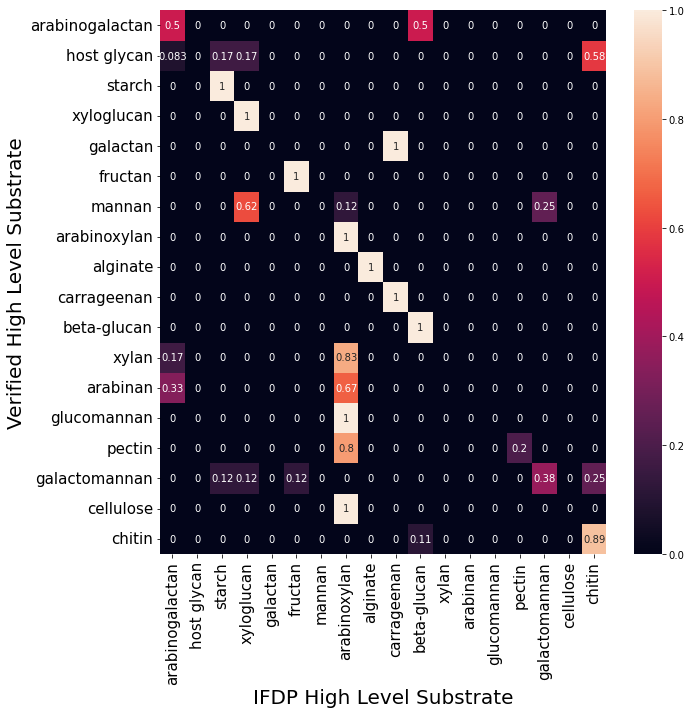

In [172]:
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel("Verified High Level Substrate", fontsize = 20)
plt.xlabel("IFDP High Level Substrate", fontsize = 20)
plt.show()